In [3]:
from PIL import Image
import matplotlib.pyplot as plt

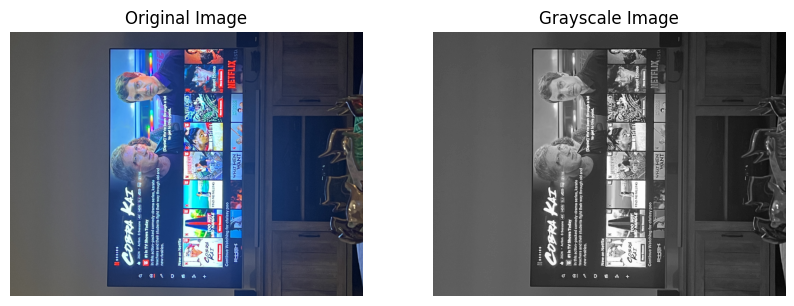

In [4]:
# Load the image
image_path = "inputs/Netflix_homescreen_TV.jpg"
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert("L")

# Plot the original and grayscale images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

# Show the plot
plt.show()


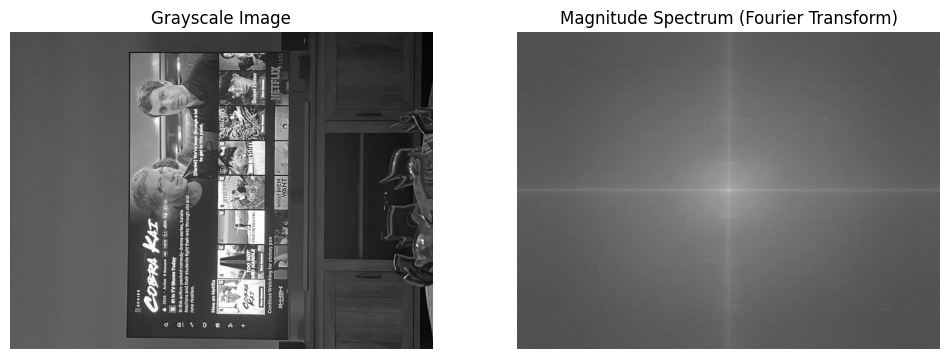

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "inputs/Netflix_homescreen_TV.jpg"
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert grayscale image to a numpy array
image_array = np.array(gray_image)

# Perform Fourier transform
f_transform = np.fft.fft2(image_array)

# Shift the zero-frequency component to the center of the spectrum
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum (log scale to improve visibility)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Plot the grayscale image and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

# Display the magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (Fourier Transform)")
plt.axis("off")

# Show the plot
plt.show()


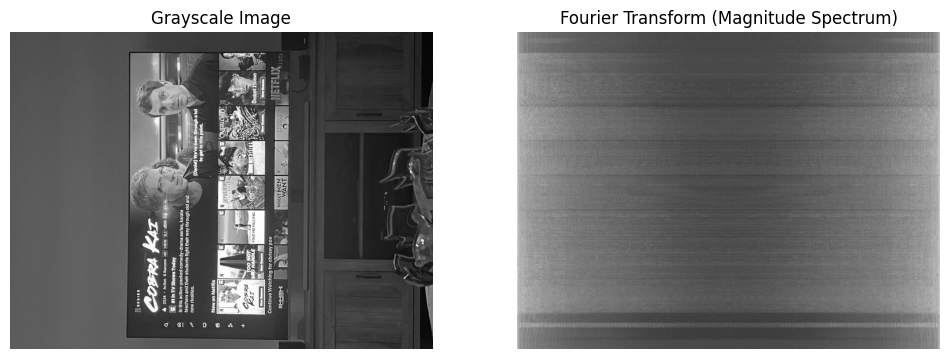

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image_path = "inputs/Netflix_homescreen_TV.jpg"
image = Image.open(image_path).convert("L")

# Convert the grayscale image to a numpy array
image_array = np.array(image)

# Take the Fourier Transform along the x-axis (rows) for each column
fourier_transform = np.fft.fft(image_array, axis=1)

# Get the magnitude of the Fourier transform for visualization
magnitude_spectrum = np.abs(fourier_transform)

# Plot the grayscale image and its Fourier Transform
plt.figure(figsize=(12, 6))

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

# Display the magnitude spectrum of the Fourier transform
plt.subplot(1, 2, 2)
plt.imshow(np.log(1+magnitude_spectrum), cmap="gray")
plt.title("Fourier Transform (Magnitude Spectrum)")
plt.axis("off")

plt.show()


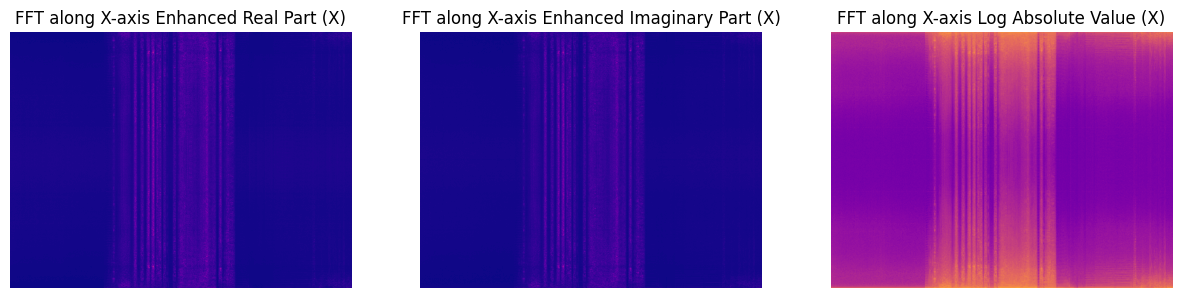

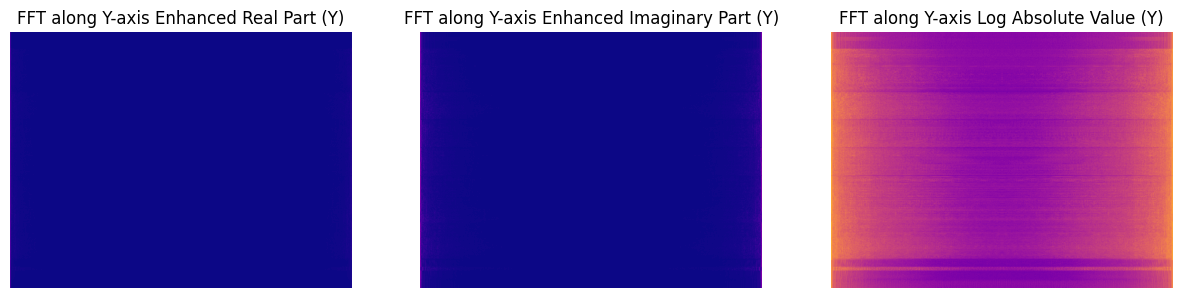

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Load the image and convert it to grayscale
image_path = "inputs/Netflix_homescreen_TV.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)

# Perform 1D FFT along the x-axis (rows)
fft_x = np.fft.fft(image_array, axis=0)

# Perform 1D FFT along the y-axis (columns)
fft_y = np.fft.fft(image_array, axis=1)

def plot_fft_results(fft_data, title_prefix, axis_name, gamma=1):
    real_part = np.abs(np.real(fft_data))
    imag_part = np.abs(np.imag(fft_data))
    abs_part = np.abs(fft_data)

    # Apply power law transformation
    real_part_expanded = normalize(real_part)
    imag_part_expanded = normalize(imag_part)
    abs_part_log = np.log(1 + abs_part)

    # Plot
    plt.figure(figsize=(15, 5))
    
    # Real part
    plt.subplot(1, 3, 1)
    plt.imshow(real_part_expanded, cmap="plasma")
    plt.title(f"{title_prefix} Enhanced Real Part ({axis_name})")
    plt.axis("off")
    
    # Imaginary part
    plt.subplot(1, 3, 2)
    plt.imshow(imag_part_expanded, cmap="plasma")
    plt.title(f"{title_prefix} Enhanced Imaginary Part ({axis_name})")
    plt.axis("off")
    
    # Log Absolute value
    plt.subplot(1, 3, 3)
    plt.imshow(abs_part_log, cmap="plasma")
    plt.title(f"{title_prefix} Log Absolute Value ({axis_name})")
    plt.axis("off")
    
    plt.show()

# Call the plotting function for both axes with an appropriate gamma value
plot_fft_results(fft_x, "FFT along X-axis", "X", gamma=1)
plot_fft_results(fft_y, "FFT along Y-axis", "Y", gamma=1)




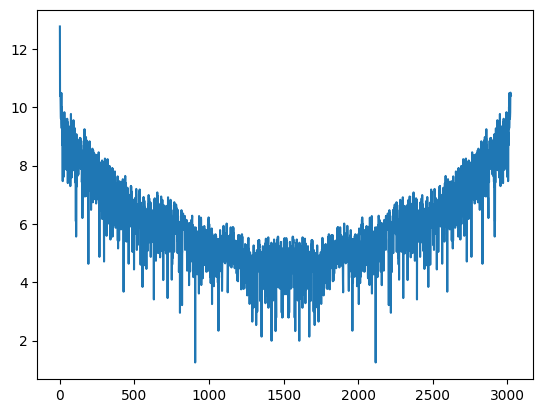

In [12]:
plt.plot(np.log(np.abs(fft_x)[:,2250]))

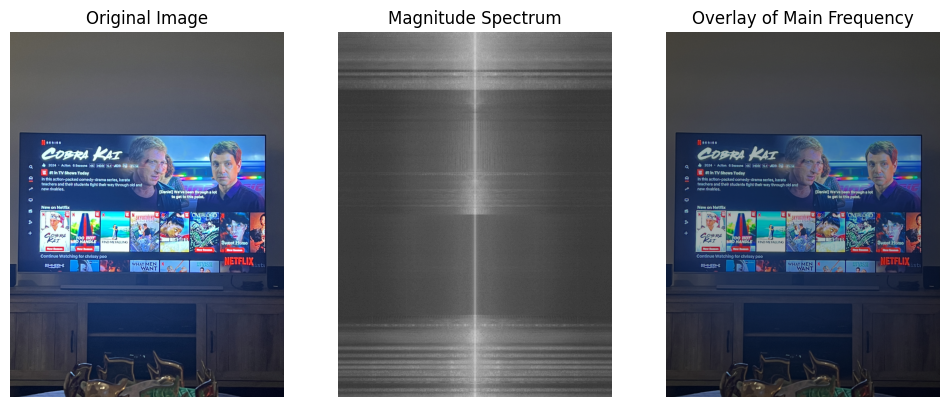

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('inputs/Netflix_homescreen_TV.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Fourier transform along the x-axis
f_transform = np.fft.fft2(gray_image, axes=(1,))
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Find the main frequency
main_freq_index = np.argmax(np.abs(f_transform_shifted))  # Find the overall max frequency index
y_index = main_freq_index // gray_image.shape[1]  # Get the corresponding row index
x_index = main_freq_index % gray_image.shape[1]   # Get the corresponding column index

# Create an overlay for the main frequency
main_freq_overlay = np.zeros_like(gray_image)
main_freq_overlay[y_index, x_index] = 255  # Highlight the main frequency

# Combine the overlay with the original image
overlay_image = cv2.addWeighted(image, 0.7, cv2.cvtColor(main_freq_overlay, cv2.COLOR_GRAY2BGR), 0.3, 0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Overlay of Main Frequency')
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
